In [1]:
import numpy as np
import pandas as pd
import re
from matplotlib import pyplot as plt
from scipy import stats
import matplotlib as mpl

In [2]:
tv_1 = pd.read_csv('tv_crawl.v2.csv',index_col='Title')
tv_1

Critic_Score               Critics_votes  \
Title                                                        
The Tudors                  64  based on 27 Critic Reviews   
Sons Of Hollywood           21   based on 8 Critic Reviews   
Chaos                       49  based on 18 Critic Reviews   
The Killing                 68  based on 23 Critic Reviews   
Game of Thrones             90  based on 26 Critic Reviews   
...                        ...                         ...   
The Miniaturist             69   based on 7 Critic Reviews   
YOU                         74  based on 16 Critic Reviews   
REL                         46   based on 6 Critic Reviews   
Kidding                     68  based on 33 Critic Reviews   
Prodigal Son                59  based on 12 Critic Reviews   

                                              Genre   Network  \
Title                                                           
The Tudors                           Drama,Suspense  SHOWTIME   
Sons Of Hollywood            Reality,Game Show,Arts       A&E   
Chaos               Comedy,Drama,Action & Adventure       CBS   
The Killing                          Drama,Suspense       AMC   
Game of Thrones    Drama,Action & Adventure,Fantasy       HBO   
...                                             ...       ...   
The Miniaturist                      Drama,Suspense       PBS   
YOU                    Drama,Suspense,Tech & Gaming  LIFETIME   
REL                                          Comedy       FOX   
Kidding                                Comedy,Drama  SHOWTIME   
Prodigal Son                                  Drama       FOX   

                         Release_Date  Season User_Score  \
Title                                                      
The Tudors              April 1, 2007       1        6.9   
Sons Of Hollywood       April 1, 2007       1        3.9   
Chaos                   April 1, 2011       1        7.3   
The Killing             April 1, 2012       2        8.2   
Game of Thrones         April 1, 2012       2        9.1   
...                               ...     ...        ...   
The Miniaturist     September 9, 2018       1        5.5   
YOU                 September 9, 2018       1        7.1   
REL                 September 9, 2018       1        2.6   
Kidding             September 9, 2018       1        7.4   
Prodigal Son       September 23, 2019       1        7.2   

                             Users_votes  
Title                                     
The Tudors          based on 130 Ratings  
Sons Of Hollywood    based on 38 Ratings  
Chaos                based on 18 Ratings  
The Killing         based on 138 Ratings  
Game of Thrones    based on 2303 Ratings  
...                                  ...  
The Miniaturist       based on 6 Ratings  
YOU                  based on 75 Ratings  
REL                   based on 9 Ratings  
Kidding              based on 99 Ratings  
Prodigal Son         based on 25 Ratings  

[3475 rows x 8 columns]

In [3]:
tv_2 = tv_1.replace('not available', 0).replace(np.nan, 0).replace(0,0).fillna(0)
tv_2

Critic_Score               Critics_votes  \
Title                                                        
The Tudors                  64  based on 27 Critic Reviews   
Sons Of Hollywood           21   based on 8 Critic Reviews   
Chaos                       49  based on 18 Critic Reviews   
The Killing                 68  based on 23 Critic Reviews   
Game of Thrones             90  based on 26 Critic Reviews   
...                        ...                         ...   
The Miniaturist             69   based on 7 Critic Reviews   
YOU                         74  based on 16 Critic Reviews   
REL                         46   based on 6 Critic Reviews   
Kidding                     68  based on 33 Critic Reviews   
Prodigal Son                59  based on 12 Critic Reviews   

                                              Genre   Network  \
Title                                                           
The Tudors                           Drama,Suspense  SHOWTIME   
Sons Of Hollywood            Reality,Game Show,Arts       A&E   
Chaos               Comedy,Drama,Action & Adventure       CBS   
The Killing                          Drama,Suspense       AMC   
Game of Thrones    Drama,Action & Adventure,Fantasy       HBO   
...                                             ...       ...   
The Miniaturist                      Drama,Suspense       PBS   
YOU                    Drama,Suspense,Tech & Gaming  LIFETIME   
REL                                          Comedy       FOX   
Kidding                                Comedy,Drama  SHOWTIME   
Prodigal Son                                  Drama       FOX   

                         Release_Date  Season User_Score  \
Title                                                      
The Tudors              April 1, 2007       1        6.9   
Sons Of Hollywood       April 1, 2007       1        3.9   
Chaos                   April 1, 2011       1        7.3   
The Killing             April 1, 2012       2        8.2   
Game of Thrones         April 1, 2012       2        9.1   
...                               ...     ...        ...   
The Miniaturist     September 9, 2018       1        5.5   
YOU                 September 9, 2018       1        7.1   
REL                 September 9, 2018       1        2.6   
Kidding             September 9, 2018       1        7.4   
Prodigal Son       September 23, 2019       1        7.2   

                             Users_votes  
Title                                     
The Tudors          based on 130 Ratings  
Sons Of Hollywood    based on 38 Ratings  
Chaos                based on 18 Ratings  
The Killing         based on 138 Ratings  
Game of Thrones    based on 2303 Ratings  
...                                  ...  
The Miniaturist       based on 6 Ratings  
YOU                  based on 75 Ratings  
REL                   based on 9 Ratings  
Kidding              based on 99 Ratings  
Prodigal Son         based on 25 Ratings  

[3475 rows x 8 columns]

## Clean and convert User votes, User scores, Critics votes, and Critics Scores from string to integers

In [4]:
tv_2.loc[tv_2.User_Score == 0, 'Users_votes'] = 0
tv_2.loc[tv_2.Critic_Score == 0, 'Critics_votes'] = 0
tv_2['Critics_votes'] = tv_2['Critics_votes'].str.lower().str.replace('based on ','').str.replace('critic reviews','')
tv_2['Users_votes'] = tv_2['Users_votes'].str.lower().str.replace(' ','').str.replace('basedon','').str.replace('\Datings','')

In [5]:
tv_2['Critics_votes'] = tv_2['Critics_votes'].astype(float)
tv_2['Users_votes'] = tv_2['Users_votes'].astype(float)
tv_2['Critic_Score'] = tv_2['Critic_Score'].astype(float)
tv_2['User_Score']= tv_2['User_Score'].astype(float)

In [6]:
tv_2

Critic_Score  Critics_votes  \
Title                                            
The Tudors                 64.0           27.0   
Sons Of Hollywood          21.0            8.0   
Chaos                      49.0           18.0   
The Killing                68.0           23.0   
Game of Thrones            90.0           26.0   
...                         ...            ...   
The Miniaturist            69.0            7.0   
YOU                        74.0           16.0   
REL                        46.0            6.0   
Kidding                    68.0           33.0   
Prodigal Son               59.0           12.0   

                                              Genre   Network  \
Title                                                           
The Tudors                           Drama,Suspense  SHOWTIME   
Sons Of Hollywood            Reality,Game Show,Arts       A&E   
Chaos               Comedy,Drama,Action & Adventure       CBS   
The Killing                          Drama,Suspense       AMC   
Game of Thrones    Drama,Action & Adventure,Fantasy       HBO   
...                                             ...       ...   
The Miniaturist                      Drama,Suspense       PBS   
YOU                    Drama,Suspense,Tech & Gaming  LIFETIME   
REL                                          Comedy       FOX   
Kidding                                Comedy,Drama  SHOWTIME   
Prodigal Son                                  Drama       FOX   

                         Release_Date  Season  User_Score  Users_votes  
Title                                                                   
The Tudors              April 1, 2007       1         6.9        130.0  
Sons Of Hollywood       April 1, 2007       1         3.9         38.0  
Chaos                   April 1, 2011       1         7.3         18.0  
The Killing             April 1, 2012       2         8.2        138.0  
Game of Thrones         April 1, 2012       2         9.1       2303.0  
...                               ...     ...         ...          ...  
The Miniaturist     September 9, 2018       1         5.5          6.0  
YOU                 September 9, 2018       1         7.1         75.0  
REL                 September 9, 2018       1         2.6          9.0  
Kidding             September 9, 2018       1         7.4         99.0  
Prodigal Son       September 23, 2019       1         7.2         25.0  

[3475 rows x 8 columns]

## Convert Release Date to datetime format 

In [7]:
tv_2['Release_Date'] = pd.to_datetime(tv_2['Release_Date'], format='%B %d, %Y', errors = 'coerce')
tv_2

Critic_Score  Critics_votes  \
Title                                            
The Tudors                 64.0           27.0   
Sons Of Hollywood          21.0            8.0   
Chaos                      49.0           18.0   
The Killing                68.0           23.0   
Game of Thrones            90.0           26.0   
...                         ...            ...   
The Miniaturist            69.0            7.0   
YOU                        74.0           16.0   
REL                        46.0            6.0   
Kidding                    68.0           33.0   
Prodigal Son               59.0           12.0   

                                              Genre   Network Release_Date  \
Title                                                                        
The Tudors                           Drama,Suspense  SHOWTIME   2007-04-01   
Sons Of Hollywood            Reality,Game Show,Arts       A&E   2007-04-01   
Chaos               Comedy,Drama,Action & Adventure       CBS   2011-04-01   
The Killing                          Drama,Suspense       AMC   2012-04-01   
Game of Thrones    Drama,Action & Adventure,Fantasy       HBO   2012-04-01   
...                                             ...       ...          ...   
The Miniaturist                      Drama,Suspense       PBS   2018-09-09   
YOU                    Drama,Suspense,Tech & Gaming  LIFETIME   2018-09-09   
REL                                          Comedy       FOX   2018-09-09   
Kidding                                Comedy,Drama  SHOWTIME   2018-09-09   
Prodigal Son                                  Drama       FOX   2019-09-23   

                   Season  User_Score  Users_votes  
Title                                               
The Tudors              1         6.9        130.0  
Sons Of Hollywood       1         3.9         38.0  
Chaos                   1         7.3         18.0  
The Killing             2         8.2        138.0  
Game of Thrones         2         9.1       2303.0  
...                   ...         ...          ...  
The Miniaturist         1         5.5          6.0  
YOU                     1         7.1         75.0  
REL                     1         2.6          9.0  
Kidding                 1         7.4         99.0  
Prodigal Son            1         7.2         25.0  

[3475 rows x 8 columns]

## QUESTION: Is there a pattern among popular long-running* tv shows?
**5 seasons or more*

In [8]:
got = 'Game of Thrones'
bb = 'Breaking Bad'
twd = 'The Walking Dead'
mm = 'Mad Men'
dex = 'Dexter'
hoc = 'House of Cards (2013)'
soa = 'Sons of Anarchy'
arc = 'Archer'
dd = 'Marvel\'s Daredevil'
ironf = 'Marvel\'s Iron Fist'
jj = 'Marvel\'s Jessica Jones'
lc = 'Marvel\'s Luke Cage'
uks = 'Unbreakable Kimmy Schmidt'

In [9]:
def show_sub(show):
    return tv_2.loc[show].sort_values('Season') 

In [10]:
got_df = show_sub(got)
got_df

Critic_Score  Critics_votes  \
Title                                          
Game of Thrones          80.0           28.0   
Game of Thrones          90.0           26.0   
Game of Thrones          91.0           25.0   
Game of Thrones          94.0           29.0   
Game of Thrones          91.0           29.0   
Game of Thrones          73.0            9.0   
Game of Thrones          77.0           12.0   
Game of Thrones          75.0           13.0   

                                            Genre Network Release_Date  \
Title                                                                    
Game of Thrones  Drama,Action & Adventure,Fantasy     HBO   2011-04-17   
Game of Thrones  Drama,Action & Adventure,Fantasy     HBO   2012-04-01   
Game of Thrones  Drama,Action & Adventure,Fantasy     HBO   2013-03-31   
Game of Thrones  Drama,Action & Adventure,Fantasy     HBO   2014-04-06   
Game of Thrones  Drama,Action & Adventure,Fantasy     HBO   2015-04-12   
Game of Thrones  Drama,Action & Adventure,Fantasy     HBO   2016-04-24   
Game of Thrones  Drama,Action & Adventure,Fantasy     HBO   2017-07-16   
Game of Thrones  Drama,Action & Adventure,Fantasy     HBO   2019-04-14   

                 Season  User_Score  Users_votes  
Title                                             
Game of Thrones       1         9.1       4278.0  
Game of Thrones       2         9.1       2303.0  
Game of Thrones       3         9.2       2346.0  
Game of Thrones       4         9.2       2253.0  
Game of Thrones       5         8.2       1663.0  
Game of Thrones       6         8.3       1662.0  
Game of Thrones       7         7.8       1006.0  
Game of Thrones       8         4.1       1489.0

Text(0, 0.5, 'Users Scores')

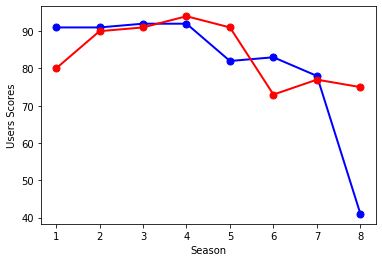

In [11]:
plt.plot(got_df['Season'],got_df['User_Score']*10, marker='o', markerfacecolor='blue', markersize=7, color='blue', linewidth=2)
plt.plot(got_df['Season'],got_df['Critic_Score'], marker='o', markerfacecolor='red', markersize=7, color='red', linewidth=2)
plt.xlabel('Season')
plt.ylabel('Users Scores')

In [12]:
bb_df = show_sub(bb)
bb_df

Critic_Score  Critics_votes           Genre Network  \
Title                                                               
Breaking Bad          73.0           27.0  Drama,Suspense     AMC   
Breaking Bad          84.0           19.0  Drama,Suspense     AMC   
Breaking Bad          89.0           15.0  Drama,Suspense     AMC   
Breaking Bad          96.0           15.0  Drama,Suspense     AMC   
Breaking Bad          99.0           22.0  Drama,Suspense     AMC   

             Release_Date  Season  User_Score  Users_votes  
Title                                                       
Breaking Bad   2008-01-20       1         9.2       4160.0  
Breaking Bad   2009-03-08       2         9.2       2047.0  
Breaking Bad   2010-03-21       3         9.4       2058.0  
Breaking Bad   2011-07-17       4         9.5       2320.0  
Breaking Bad   2012-07-15       5         9.6       4361.0

Text(0, 0.5, 'Users Scores')

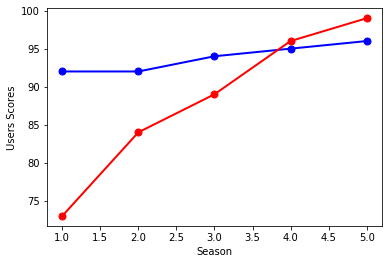

In [13]:
plt.plot(bb_df['Season'],bb_df['User_Score']*10, marker='o', markerfacecolor='blue', markersize=7, color='blue', linewidth=2)
plt.plot(bb_df['Season'],bb_df['Critic_Score'], marker='o', markerfacecolor='red', markersize=7, color='red', linewidth=2)
plt.xlabel('Season')
plt.ylabel('Users Scores')

In [14]:
hoc_df = show_sub(hoc)
hoc_df

Critic_Score  Critics_votes  Genre  Network  \
Title                                                                
House of Cards (2013)          76.0           25.0  Drama  Netflix   
House of Cards (2013)          80.0           25.0  Drama  Netflix   
House of Cards (2013)          76.0           24.0  Drama  Netflix   
House of Cards (2013)          76.0           17.0  Drama  Netflix   
House of Cards (2013)          60.0           11.0  Drama  Netflix   
House of Cards (2013)          62.0           23.0  Drama  Netflix   

                      Release_Date  Season  User_Score  Users_votes  
Title                                                                
House of Cards (2013)   2013-02-01       1         8.9       1229.0  
House of Cards (2013)   2014-02-14       2         8.7        620.0  
House of Cards (2013)   2015-02-27       3         7.3        444.0  
House of Cards (2013)   2016-03-04       4         8.4        401.0  
House of Cards (2013)   2017-05-20       5         6.1        219.0  
House of Cards (2013)   2018-11-02       6         3.2        174.0

Text(0, 0.5, 'Users Scores')

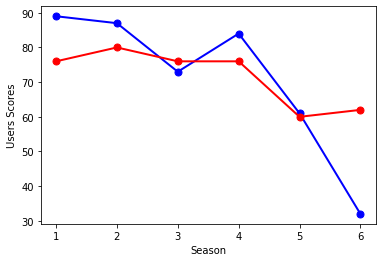

In [15]:
plt.plot(hoc_df['Season'],hoc_df['User_Score']*10, marker='o', markerfacecolor='blue', markersize=7, color='blue', linewidth=2)
plt.plot(hoc_df['Season'],hoc_df['Critic_Score'], marker='o', markerfacecolor='red', markersize=7, color='red', linewidth=2)
plt.xlabel('Season')
plt.ylabel('Users Scores')

In [16]:
twd_df = show_sub(twd)
twd_df

Critic_Score  Critics_votes  \
Title                                           
The Walking Dead          82.0           25.0   
The Walking Dead          80.0           22.0   
The Walking Dead          82.0           19.0   
The Walking Dead          75.0           16.0   
The Walking Dead          80.0           11.0   
The Walking Dead          79.0           10.0   
The Walking Dead          72.0            4.0   

                                                              Genre Network  \
Title                                                                         
The Walking Dead  Drama,Action & Adventure,Fantasy,Horror,Suspen...     AMC   
The Walking Dead  Drama,Action & Adventure,Fantasy,Horror,Suspen...     AMC   
The Walking Dead  Drama,Action & Adventure,Fantasy,Horror,Suspen...     AMC   
The Walking Dead  Drama,Action & Adventure,Fantasy,Horror,Suspen...     AMC   
The Walking Dead  Drama,Action & Adventure,Fantasy,Horror,Suspen...     AMC   
The Walking Dead  Drama,Action & Adventure,Fantasy,Horror,Suspen...     AMC   
The Walking Dead  Drama,Action & Adventure,Fantasy,Horror,Suspen...     AMC   

                 Release_Date  Season  User_Score  Users_votes  
Title                                                           
The Walking Dead   2010-10-31       1         8.1       2739.0  
The Walking Dead   2011-10-16       2         7.1       1542.0  
The Walking Dead   2012-10-14       3         7.6       1465.0  
The Walking Dead   2013-10-13       4         6.9       1140.0  
The Walking Dead   2014-10-12       5         7.1        902.0  
The Walking Dead   2015-10-11       6         6.5        660.0  
The Walking Dead   2018-10-07       9         7.0        121.0

Text(0, 0.5, 'Users Scores')

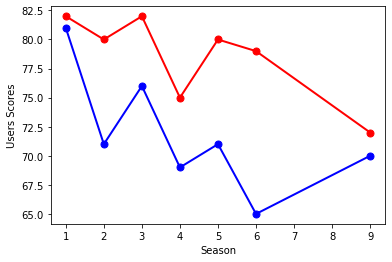

In [17]:
plt.plot(twd_df['Season'],twd_df['User_Score']*10, marker='o', markerfacecolor='blue', markersize=7, color='blue', linewidth=2)
plt.plot(twd_df['Season'],twd_df['Critic_Score'], marker='o', markerfacecolor='red', markersize=7, color='red', linewidth=2)
plt.xlabel('Season')
plt.ylabel('Users Scores')

In [18]:
arc_df = show_sub(arc)
arc_df

Critic_Score  Critics_votes                                Genre  \
Title                                                                      
Archer          78.0           20.0  Comedy,Animation,Action & Adventure   
Archer          88.0           12.0  Comedy,Animation,Action & Adventure   
Archer          75.0            6.0  Comedy,Animation,Action & Adventure   
Archer          79.0            6.0  Comedy,Animation,Action & Adventure   
Archer          78.0            5.0  Comedy,Animation,Action & Adventure   
Archer          78.0            6.0  Comedy,Animation,Action & Adventure   
Archer          72.0            8.0  Comedy,Animation,Action & Adventure   
Archer          74.0            4.0  Comedy,Animation,Action & Adventure   

       Network Release_Date  Season  User_Score  Users_votes  
Title                                                         
Archer      FX   2009-09-17       1         9.0        398.0  
Archer      FX   2011-01-27       2         9.1        233.0  
Archer      FX   2011-09-15       3         8.8        148.0  
Archer      FX   2013-01-17       4         9.0        169.0  
Archer      FX   2015-01-08       6         8.4         99.0  
Archer      FX   2016-03-31       7         8.5         72.0  
Archer      FX   2017-04-05       8         6.1         74.0  
Archer      FX   2019-05-29      10         7.4         18.0

Text(0, 0.5, 'Users Scores')

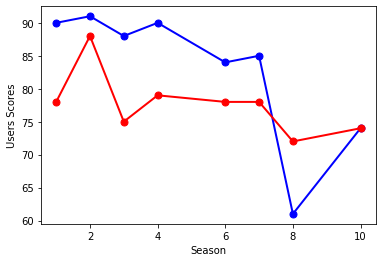

In [19]:
plt.plot(arc_df['Season'],arc_df['User_Score']*10, marker='o', markerfacecolor='blue', markersize=7, color='blue', linewidth=2)
plt.plot(arc_df['Season'],arc_df['Critic_Score'], marker='o', markerfacecolor='red', markersize=7, color='red', linewidth=2)
plt.xlabel('Season')
plt.ylabel('Users Scores')

In [20]:
dd_df = show_sub(dd)
lc_df = show_sub(lc)
ironf_df = show_sub(ironf)
jj_df = show_sub(jj)

Text(0, 0.5, 'Users Scores')

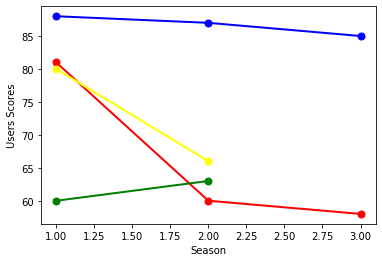

In [21]:
plt.plot(dd_df['Season'],dd_df['User_Score']*10, marker='o', markerfacecolor='blue', markersize=7, color='blue', linewidth=2)
plt.plot(jj_df['Season'],jj_df['User_Score']*10, marker='o', markerfacecolor='red', markersize=7, color='red', linewidth=2)
plt.plot(lc_df['Season'],lc_df['User_Score']*10, marker='o', markerfacecolor='yellow', markersize=7, color='yellow', linewidth=2)
plt.plot(ironf_df['Season'],ironf_df['User_Score']*10, marker='o', markerfacecolor='green', markersize=7, color='green', linewidth=2)
plt.xlabel('Season')
plt.ylabel('Users Scores')

In [22]:
uks_df = show_sub(uks)
uks_df

Critic_Score  Critics_votes   Genre  Network  \
Title                                                                     
Unbreakable Kimmy Schmidt          78.0           29.0  Comedy  Netflix   
Unbreakable Kimmy Schmidt          82.0           16.0  Comedy  Netflix   
Unbreakable Kimmy Schmidt          78.0           12.0  Comedy  Netflix   
Unbreakable Kimmy Schmidt          85.0            6.0  Comedy  Netflix   

                          Release_Date  Season  User_Score  Users_votes  
Title                                                                    
Unbreakable Kimmy Schmidt   2015-03-06       1         8.0        301.0  
Unbreakable Kimmy Schmidt   2016-04-15       2         7.6        150.0  
Unbreakable Kimmy Schmidt   2017-05-19       3         7.0         90.0  
Unbreakable Kimmy Schmidt   2018-05-30       4         7.6         55.0

Text(0, 0.5, 'Users Scores')

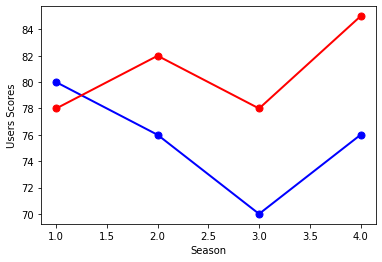

In [23]:
plt.plot(uks_df['Season'],uks_df['User_Score']*10, marker='o', markerfacecolor='blue', markersize=7, color='blue', linewidth=2)
plt.plot(uks_df['Season'],uks_df['Critic_Score'], marker='o', markerfacecolor='red', markersize=7, color='red', linewidth=2)
plt.xlabel('Season')
plt.ylabel('Users Scores')

## QUESTION: Is there a pattern among the popular networks?

In [24]:
hbo = tv_2.loc[tv_2.Network=="HBO",:].dropna()
nbc = tv_2.loc[tv_2.Network=="NBC",:].dropna()
abc = tv_2.loc[tv_2.Network=="ABC",:].dropna()
nf = tv_2.loc[tv_2.Network=="Netflix",:].dropna()
fox = tv_2.loc[tv_2.Network=="FOX",:].dropna()
hulu = tv_2.loc[tv_2.Network=="Hulu",:].dropna()
cw = tv_2.loc[tv_2.Network=="The CW",:].dropna()
amazon = tv_2.loc[tv_2.Network=="Amazon Prime",:].dropna()
apple = tv_2.loc[tv_2.Network=="Apple TV+",:].dropna()

In [25]:
hbo_genre = hbo['Genre'].value_counts()
hbo_genre

Comedy                                         51
Drama                                          39
Drama,Movie/Mini-Series                        31
Comedy,Drama                                   24
Movie/Mini-Series,Documentary                  14
                                               ..
News/Documentary                                1
Comedy,Animation,Talk & Interview               1
Comedy,Variety Shows,Talk & Interview           1
Reality                                         1
Sports,Reality,News/Documentary,Documentary     1
Name: Genre, Length: 67, dtype: int64

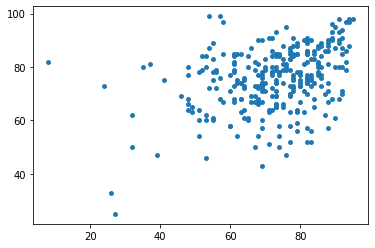

In [26]:
# plt.figure(figsize=(20,10))
plt.scatter(hbo['User_Score']*10,hbo['Critic_Score'], s=15)
mpl.rcParams['font.size'] =15.0

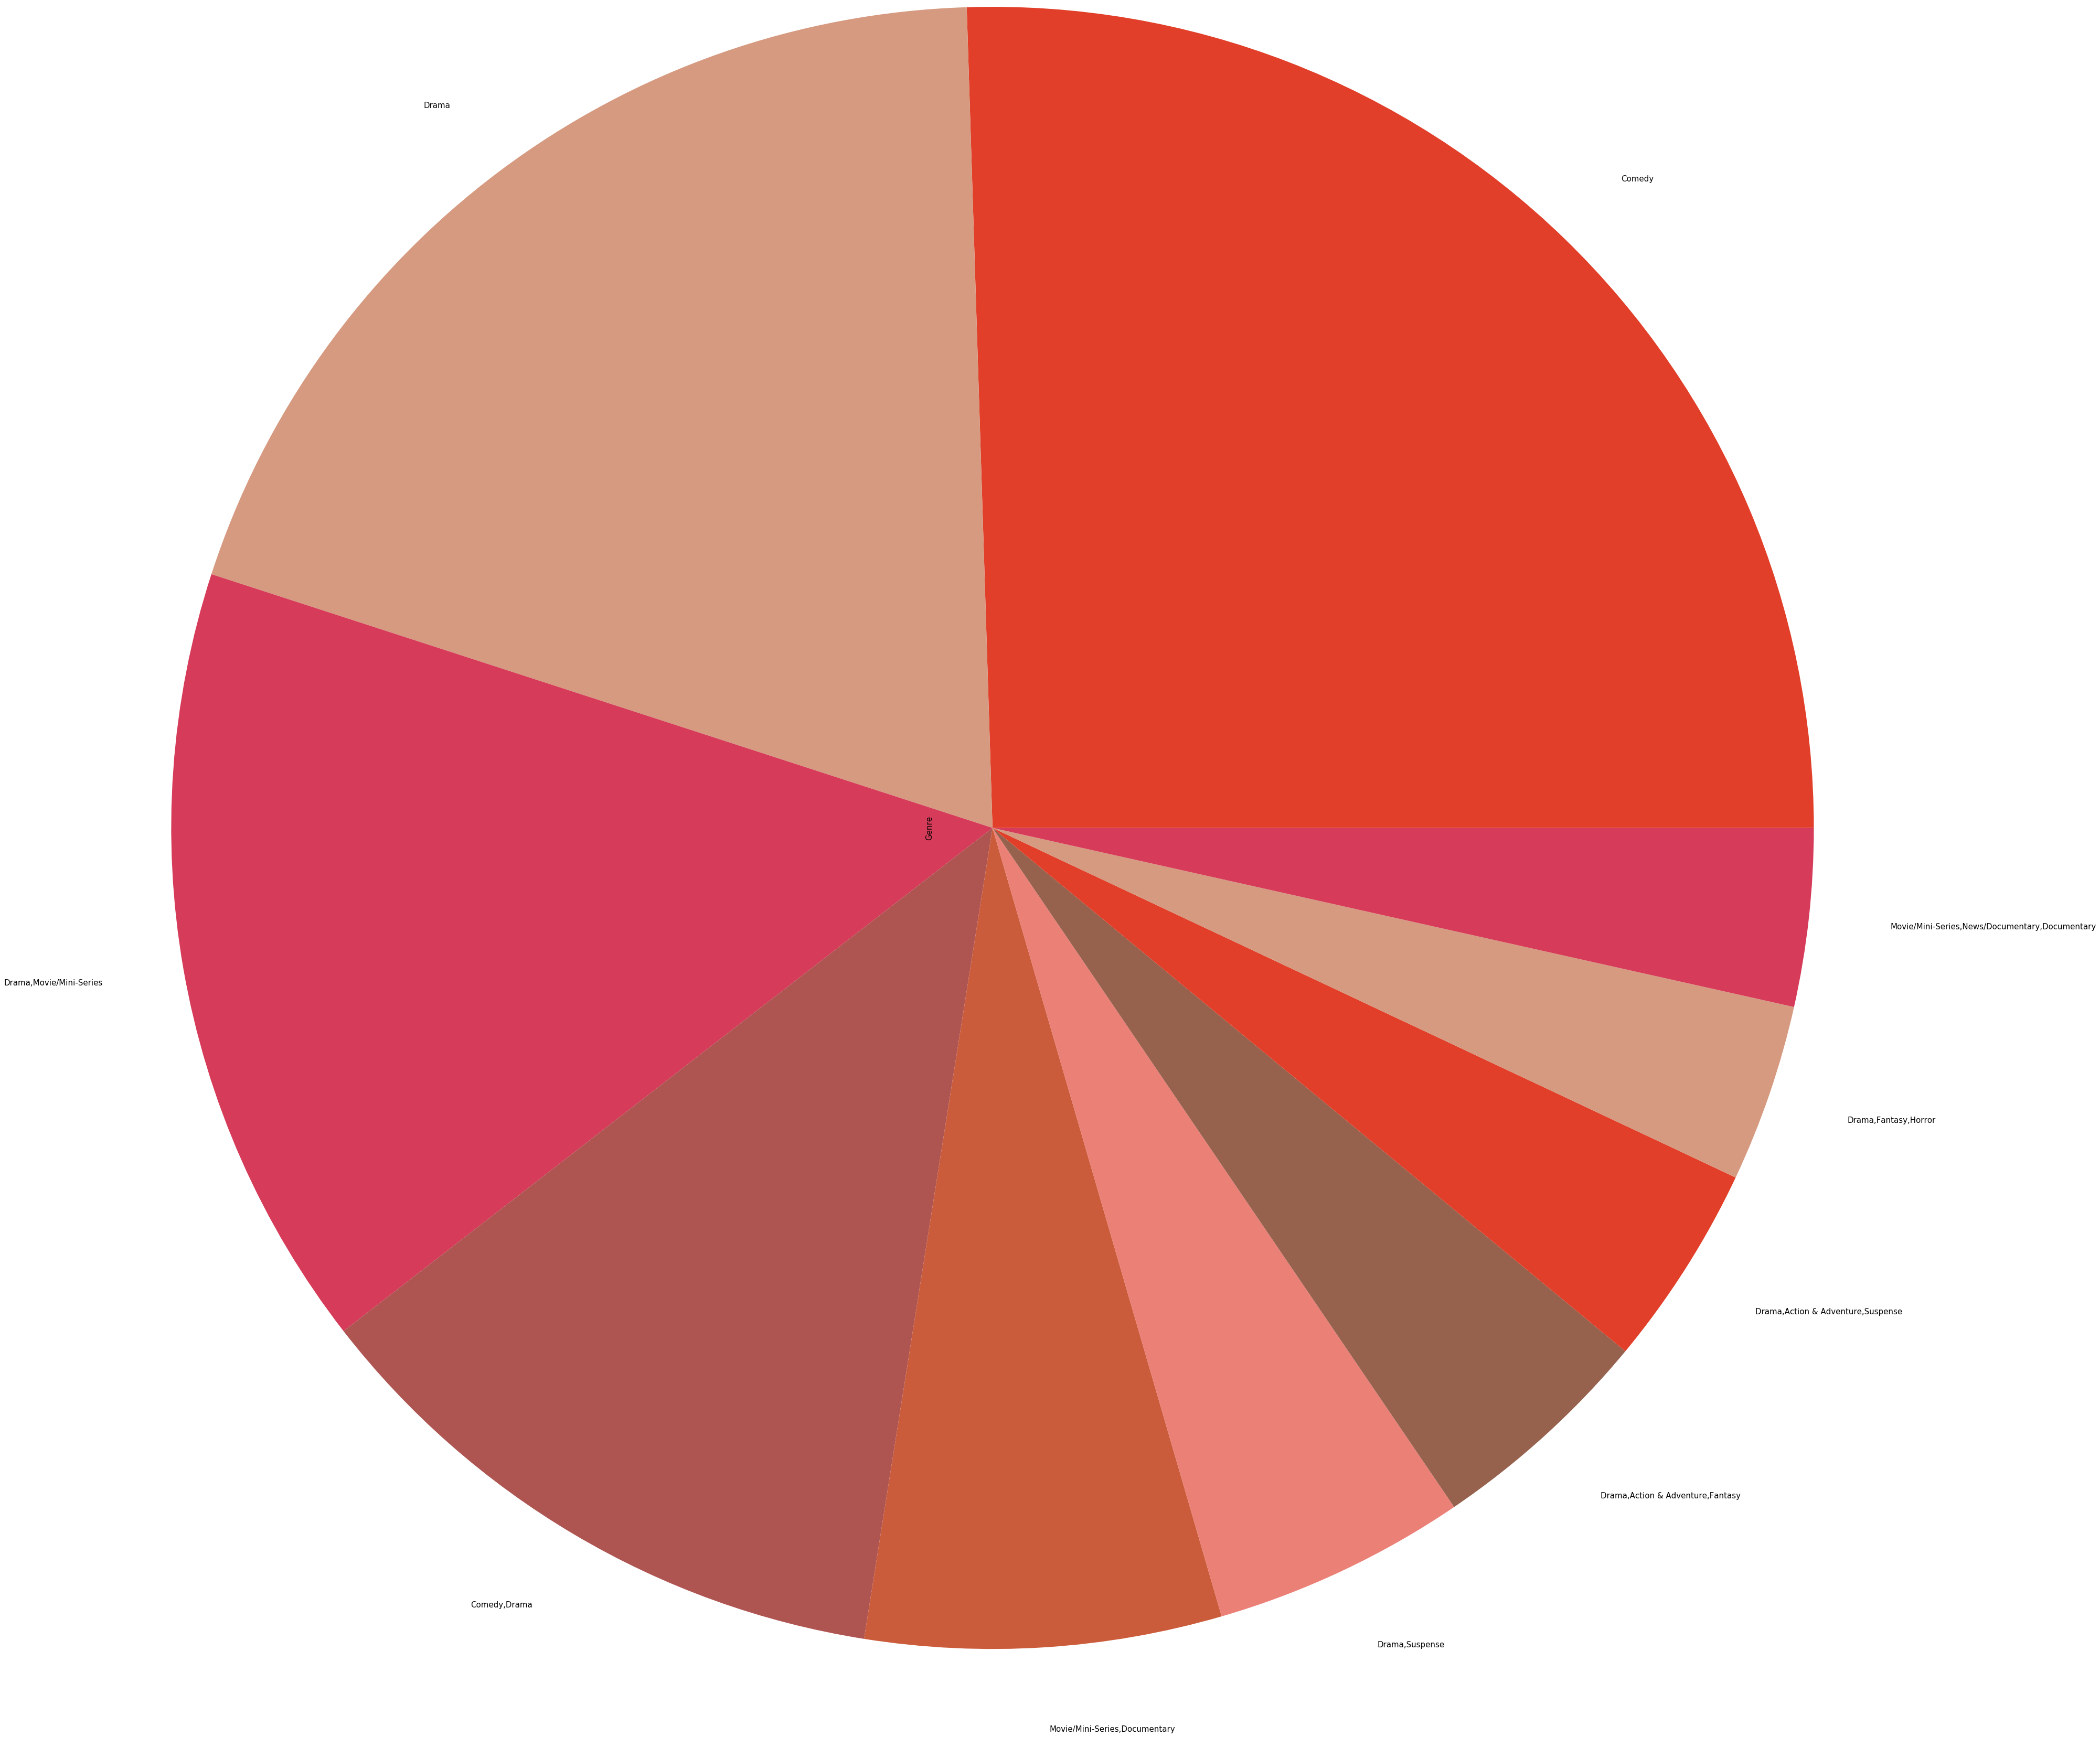

<Figure size 80x80 with 0 Axes>

In [27]:
colors =  ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]
hbo_genplot = hbo_genre[:10].plot.pie(y=hbo_genre[:10].index, shadow=False, colors=colors, radius=18)
plt.figure(figsize=(1, 1), dpi=80)
mpl.rcParams['font.size'] = 150.0

In [28]:
nf_genre = nf['Genre'].value_counts()
nf_genre

Comedy                                                                  50
Drama                                                                   30
Comedy,Drama                                                            29
Drama,Suspense                                                          13
Comedy,Animation                                                         8
                                                                        ..
Comedy,Animation,Action & Adventure,Fantasy,Kids                         1
Documentary,Science                                                      1
Drama,Action & Adventure,Fantasy,Suspense,Science Fiction                1
Comedy,Animation,Action & Adventure,Fantasy                              1
Movie/Mini-Series,News/Documentary,Talk & Interview,Documentary,Arts     1
Name: Genre, Length: 62, dtype: int64

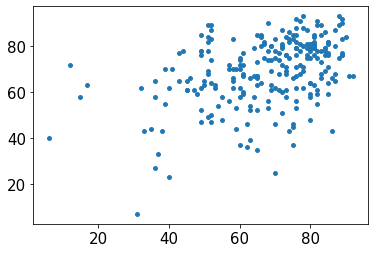

In [30]:
# plt.figure(figsize=(20,10))
plt.scatter(nf['User_Score']*10,nf['Critic_Score'], s=15)
mpl.rcParams['font.size'] =15.0

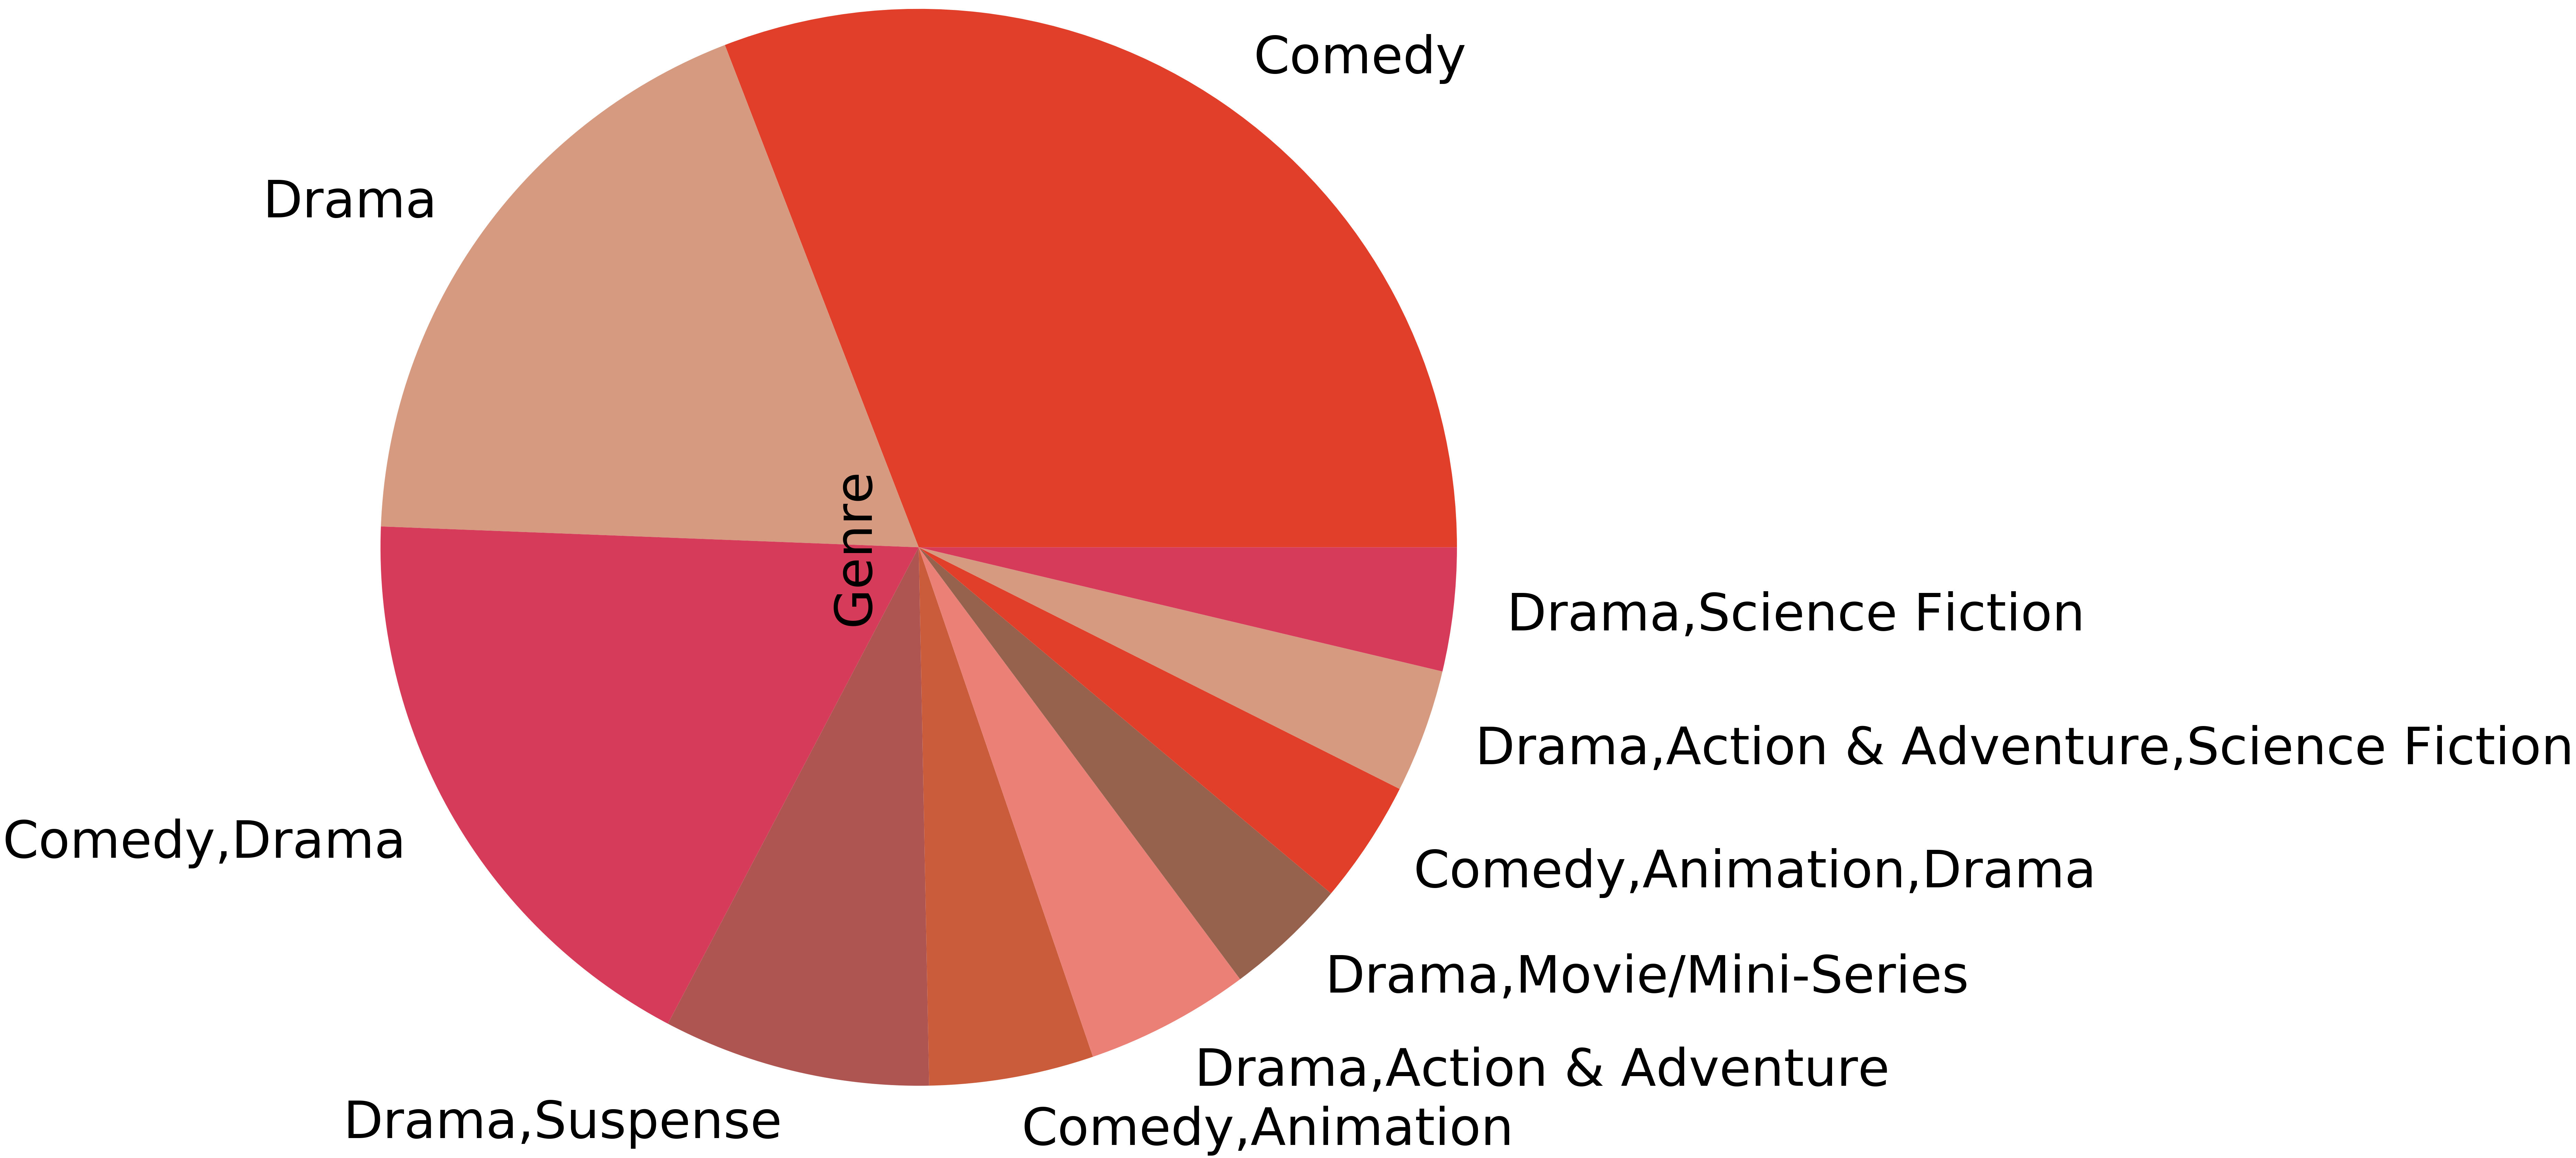

<Figure size 80x80 with 0 Axes>

In [63]:
colors =  ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]
nf_genplot = nf_genre[:10].plot.pie(y=nf_genre[:10].index, shadow=False, colors=colors, radius=18)
plt.figure(figsize=(1, 1), dpi=80)
mpl.rcParams['font.size'] = 150.0

In [32]:
apple_genre = apple['Genre'].value_counts()
apple_genre

Drama                    3
Drama,Suspense           2
Comedy,Drama             2
Comedy                   1
Suspense,Documentary     1
Documentary              1
Drama,Science Fiction    1
Name: Genre, dtype: int64

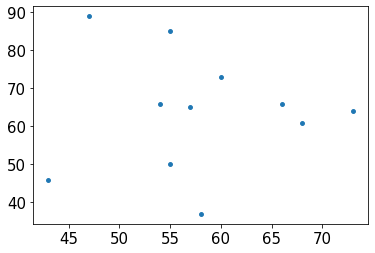

In [34]:
# plt.figure(figsize=(20,10))
plt.scatter(apple['User_Score']*10,apple['Critic_Score'], s=15)
mpl.rcParams['font.size'] =15.0

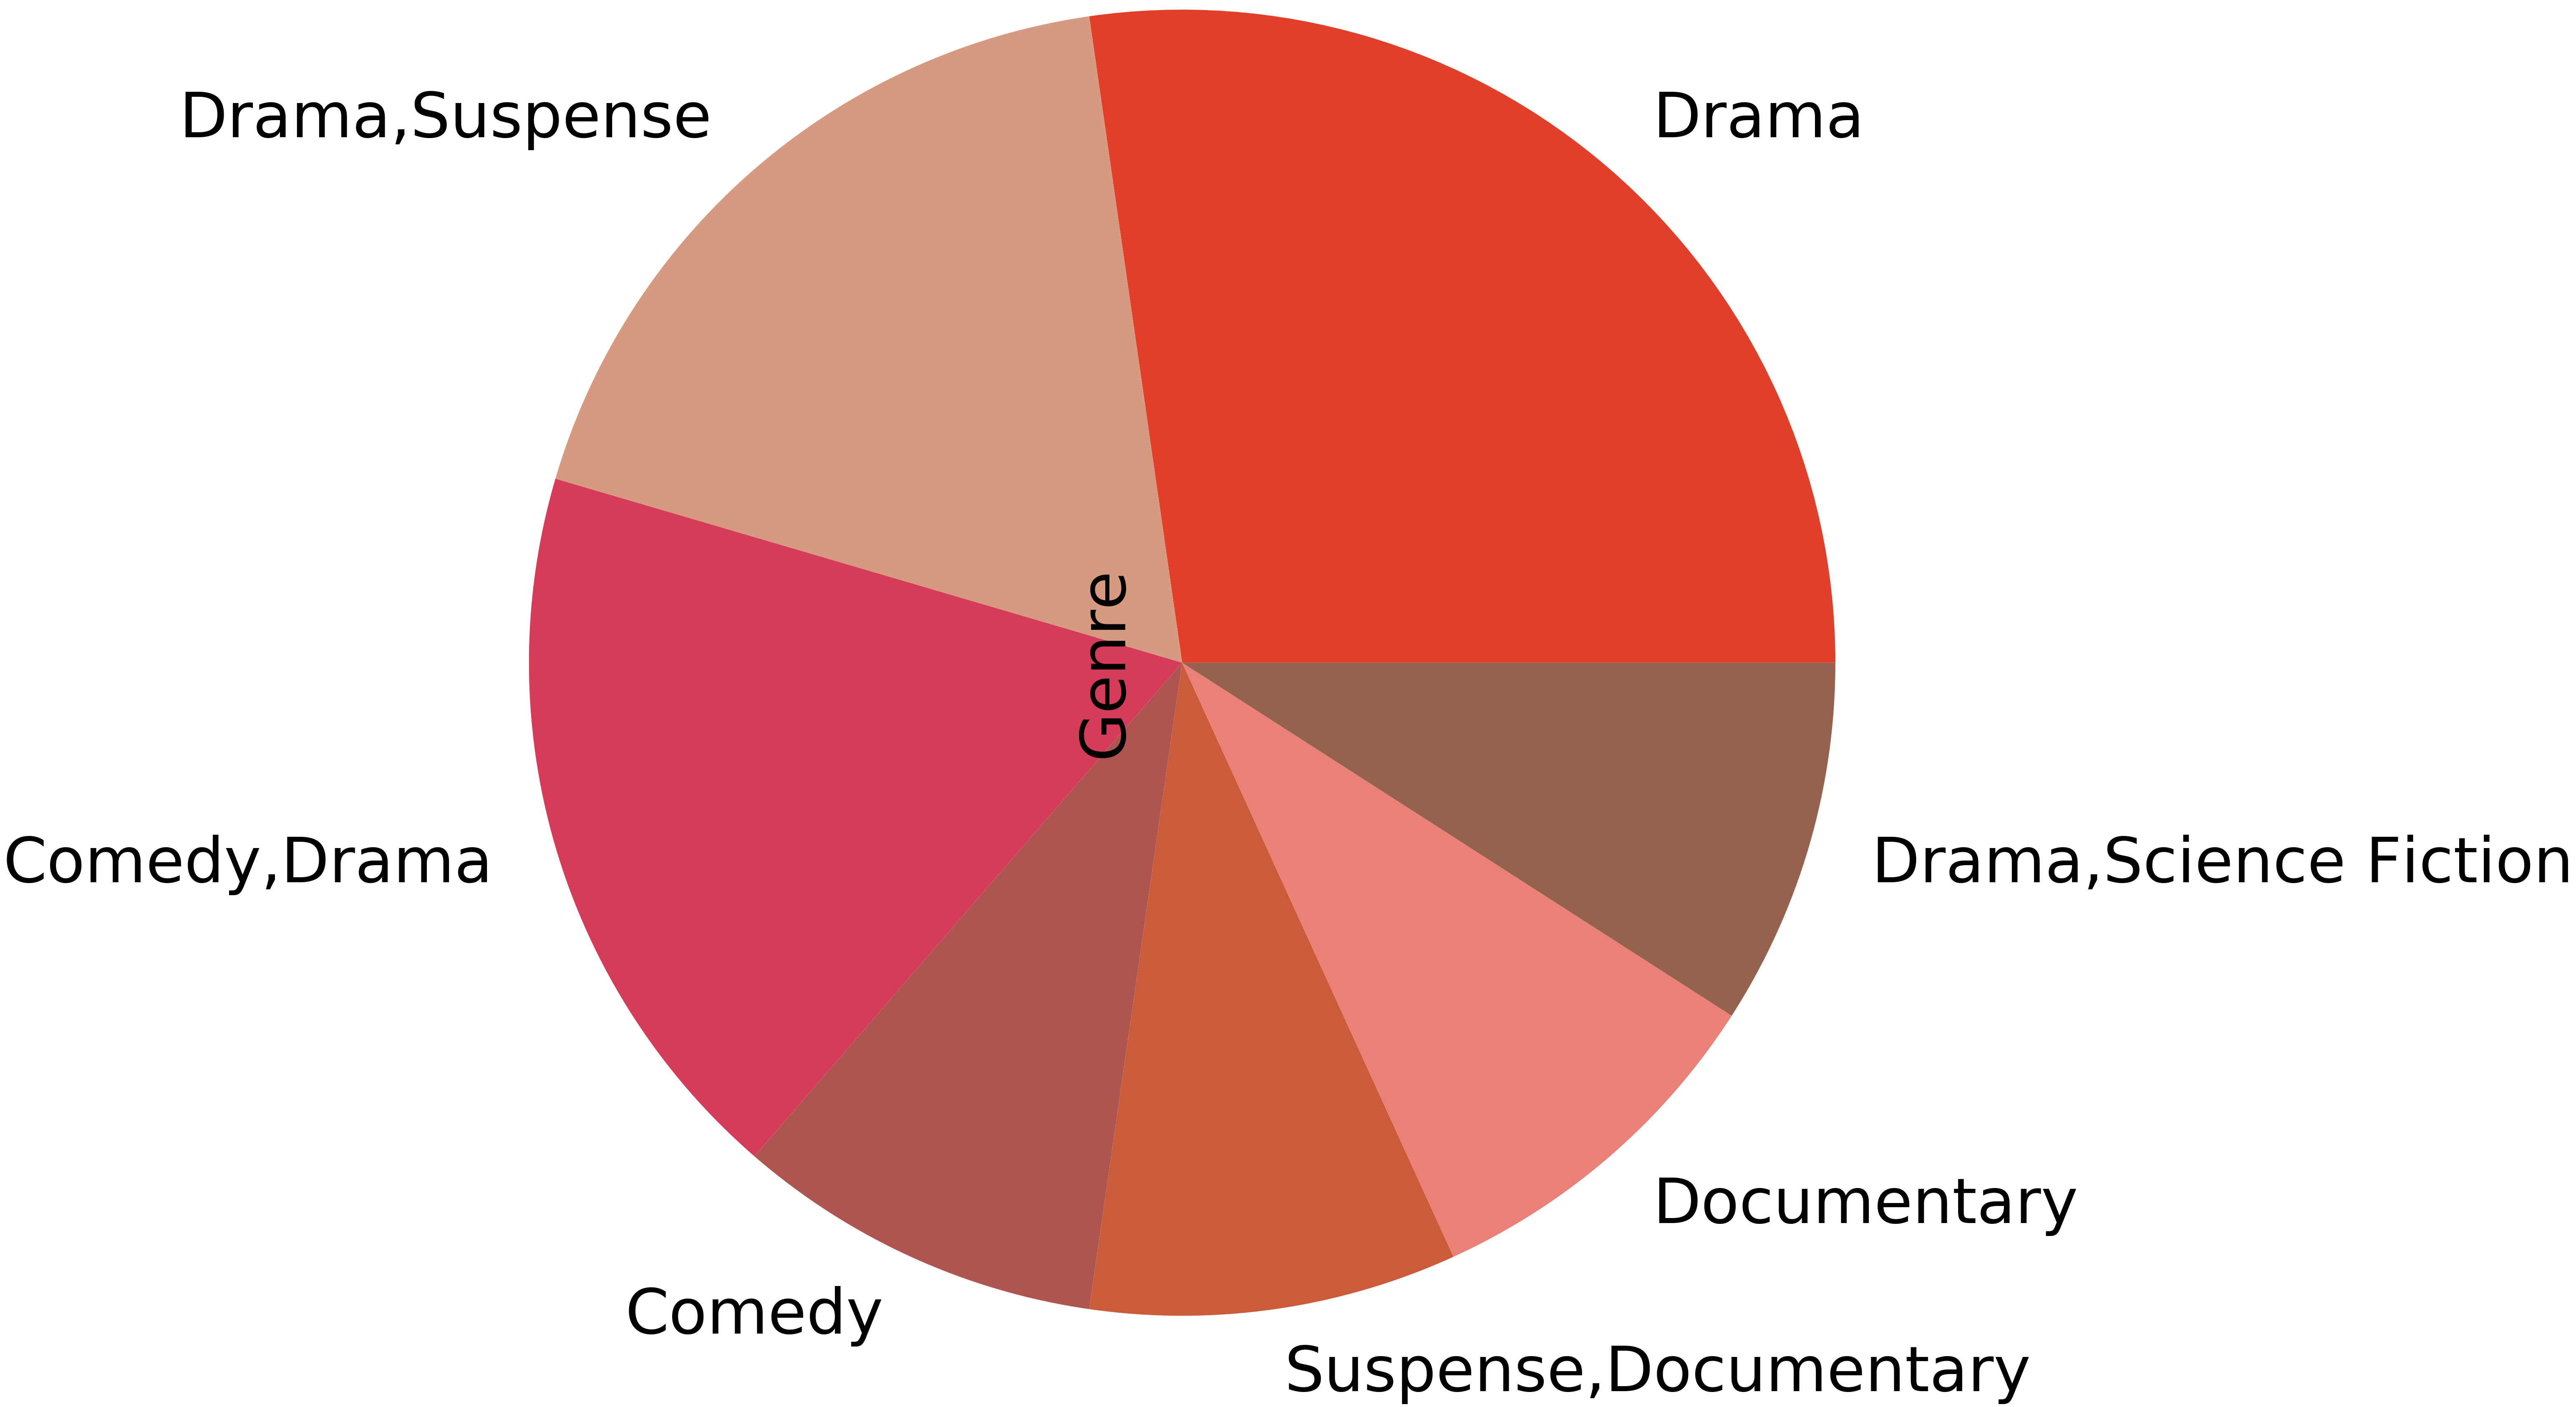

<Figure size 80x80 with 0 Axes>

In [62]:
colors =  ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]
apple_genplot = apple_genre[:10].plot.pie(y=apple_genre[:10].index, shadow=False, colors=colors, radius=18)
plt.figure(figsize=(1, 1), dpi=80)
mpl.rcParams['font.size'] = 150.0

In [36]:
amazon_genre = amazon['Genre'].value_counts()
amazon_genre

Comedy,Drama                                                      10
Drama                                                              8
Comedy                                                             4
Drama,Suspense                                                     1
Comedy,Action & Adventure,Fantasy                                  1
Comedy,News/Documentary,Talk & Interview,News,Documentary,Arts     1
Drama,Science Fiction                                              1
Drama,Horror                                                       1
News/Documentary,Documentary                                       1
Name: Genre, dtype: int64

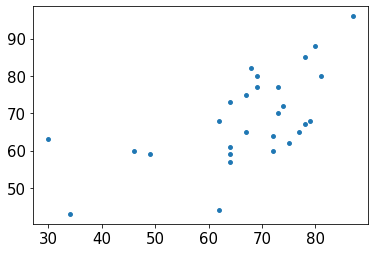

In [38]:
# plt.figure(figsize=(20,10))
plt.scatter(amazon['User_Score']*10,amazon['Critic_Score'], s=15)
mpl.rcParams['font.size'] =15.0

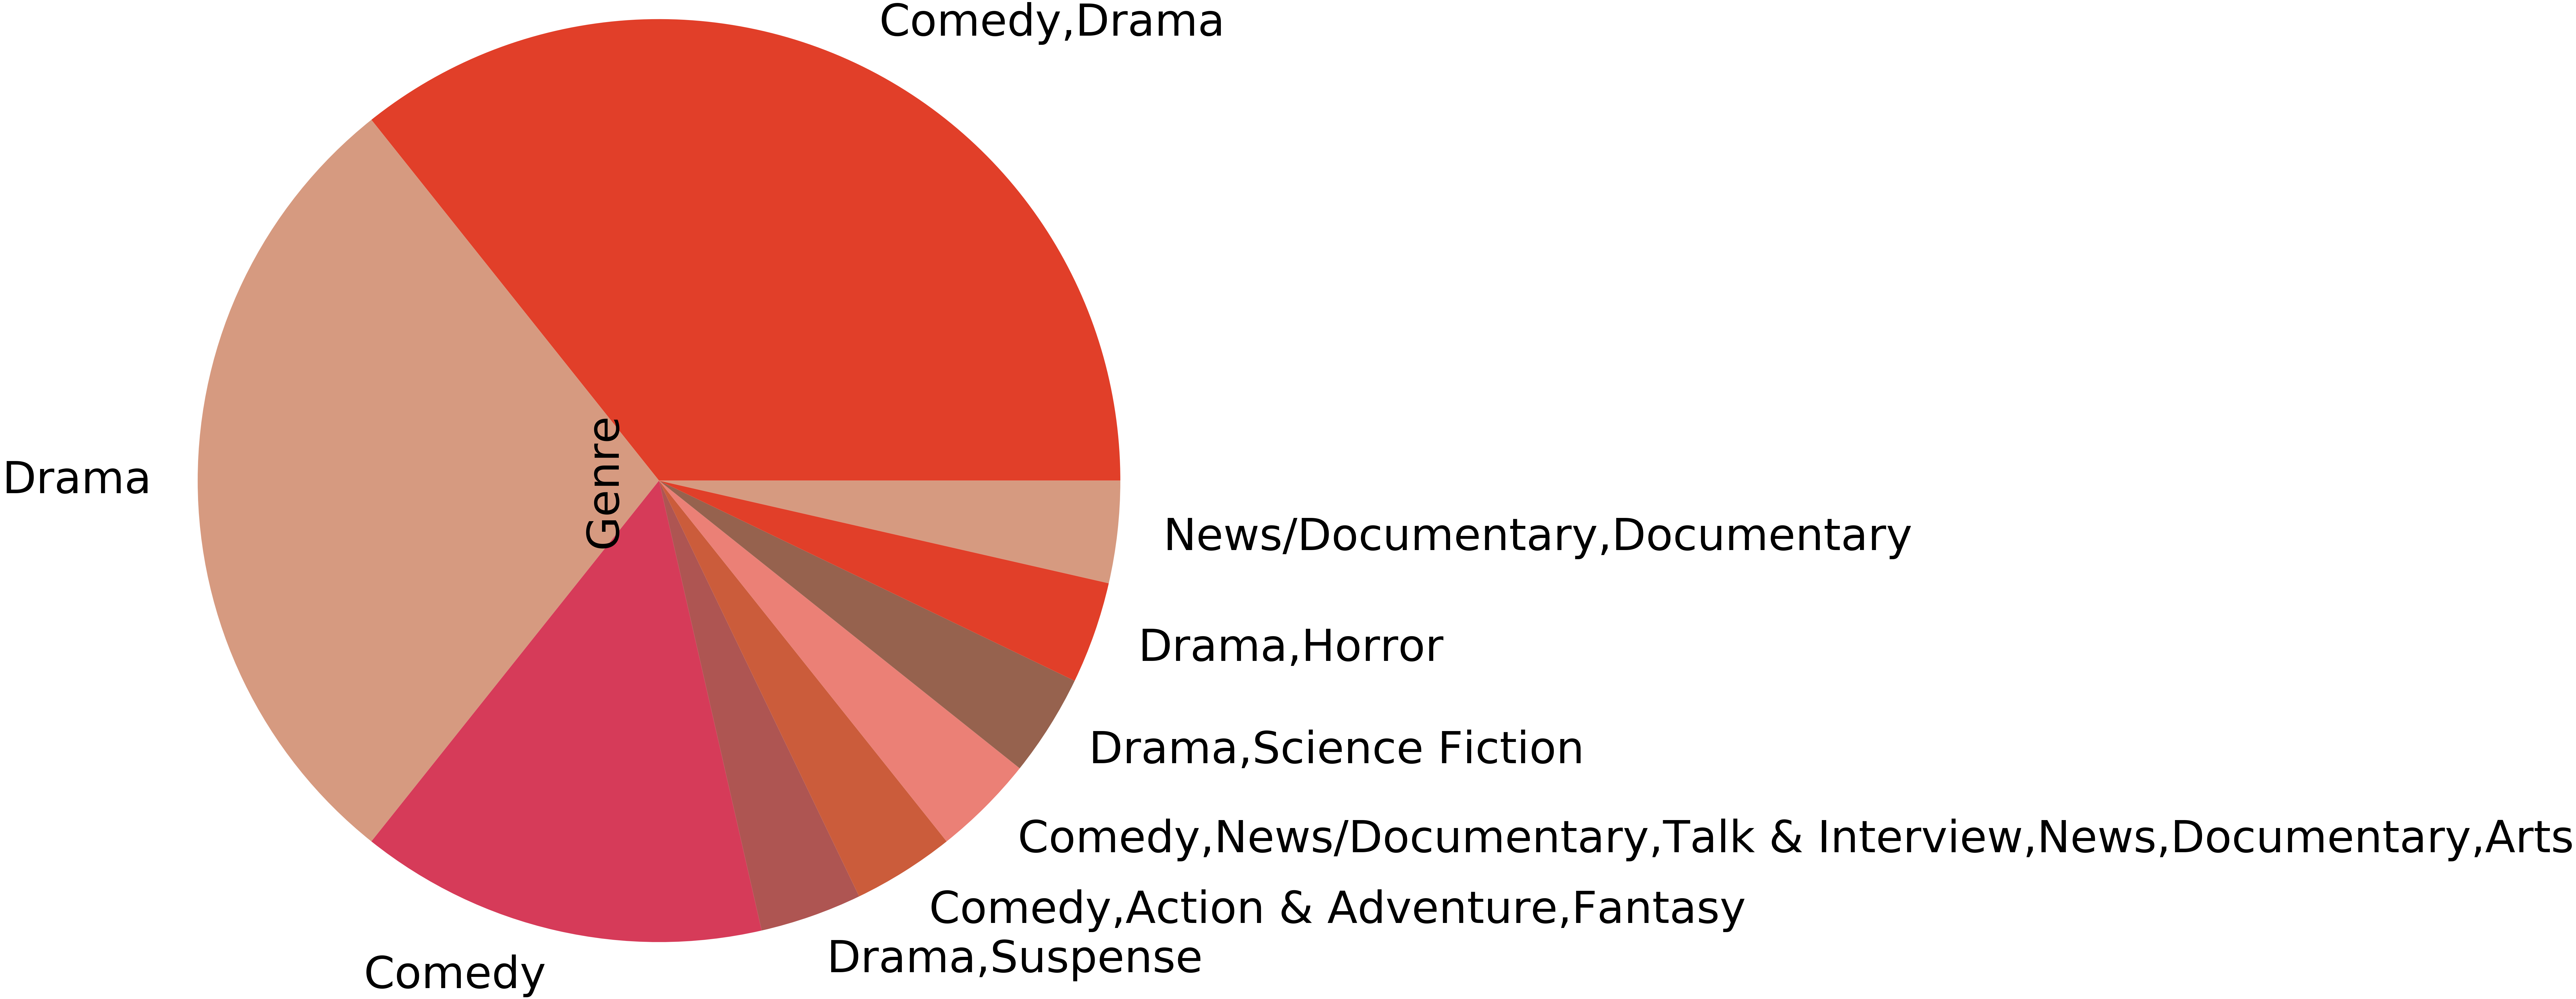

<Figure size 80x80 with 0 Axes>

In [61]:
colors =  ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]
amazon_genplot = amazon_genre[:10].plot.pie(y=amazon_genre[:10].index, shadow=False, colors=colors, radius=18)
plt.figure(figsize=(1, 1), dpi=80)
mpl.rcParams['font.size'] = 150.0

In [40]:
nbc_genre = nbc['Genre'].value_counts()
nbc_genre

Comedy                                    73
Drama                                     24
Drama,Action & Adventure,Suspense         21
Comedy,Drama                              15
Drama,Action & Adventure                  15
                                          ..
Talk & Interview,News                      1
Reality                                    1
Events & Specials,Music                    1
Drama,Fantasy,Horror                       1
Comedy,Variety Shows,Events & Specials     1
Name: Genre, Length: 62, dtype: int64

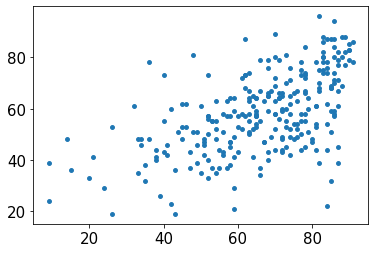

In [42]:
# plt.figure(figsize=(20,10))
plt.scatter(nbc['User_Score']*10,nbc['Critic_Score'], s=15)
mpl.rcParams['font.size'] =15.0

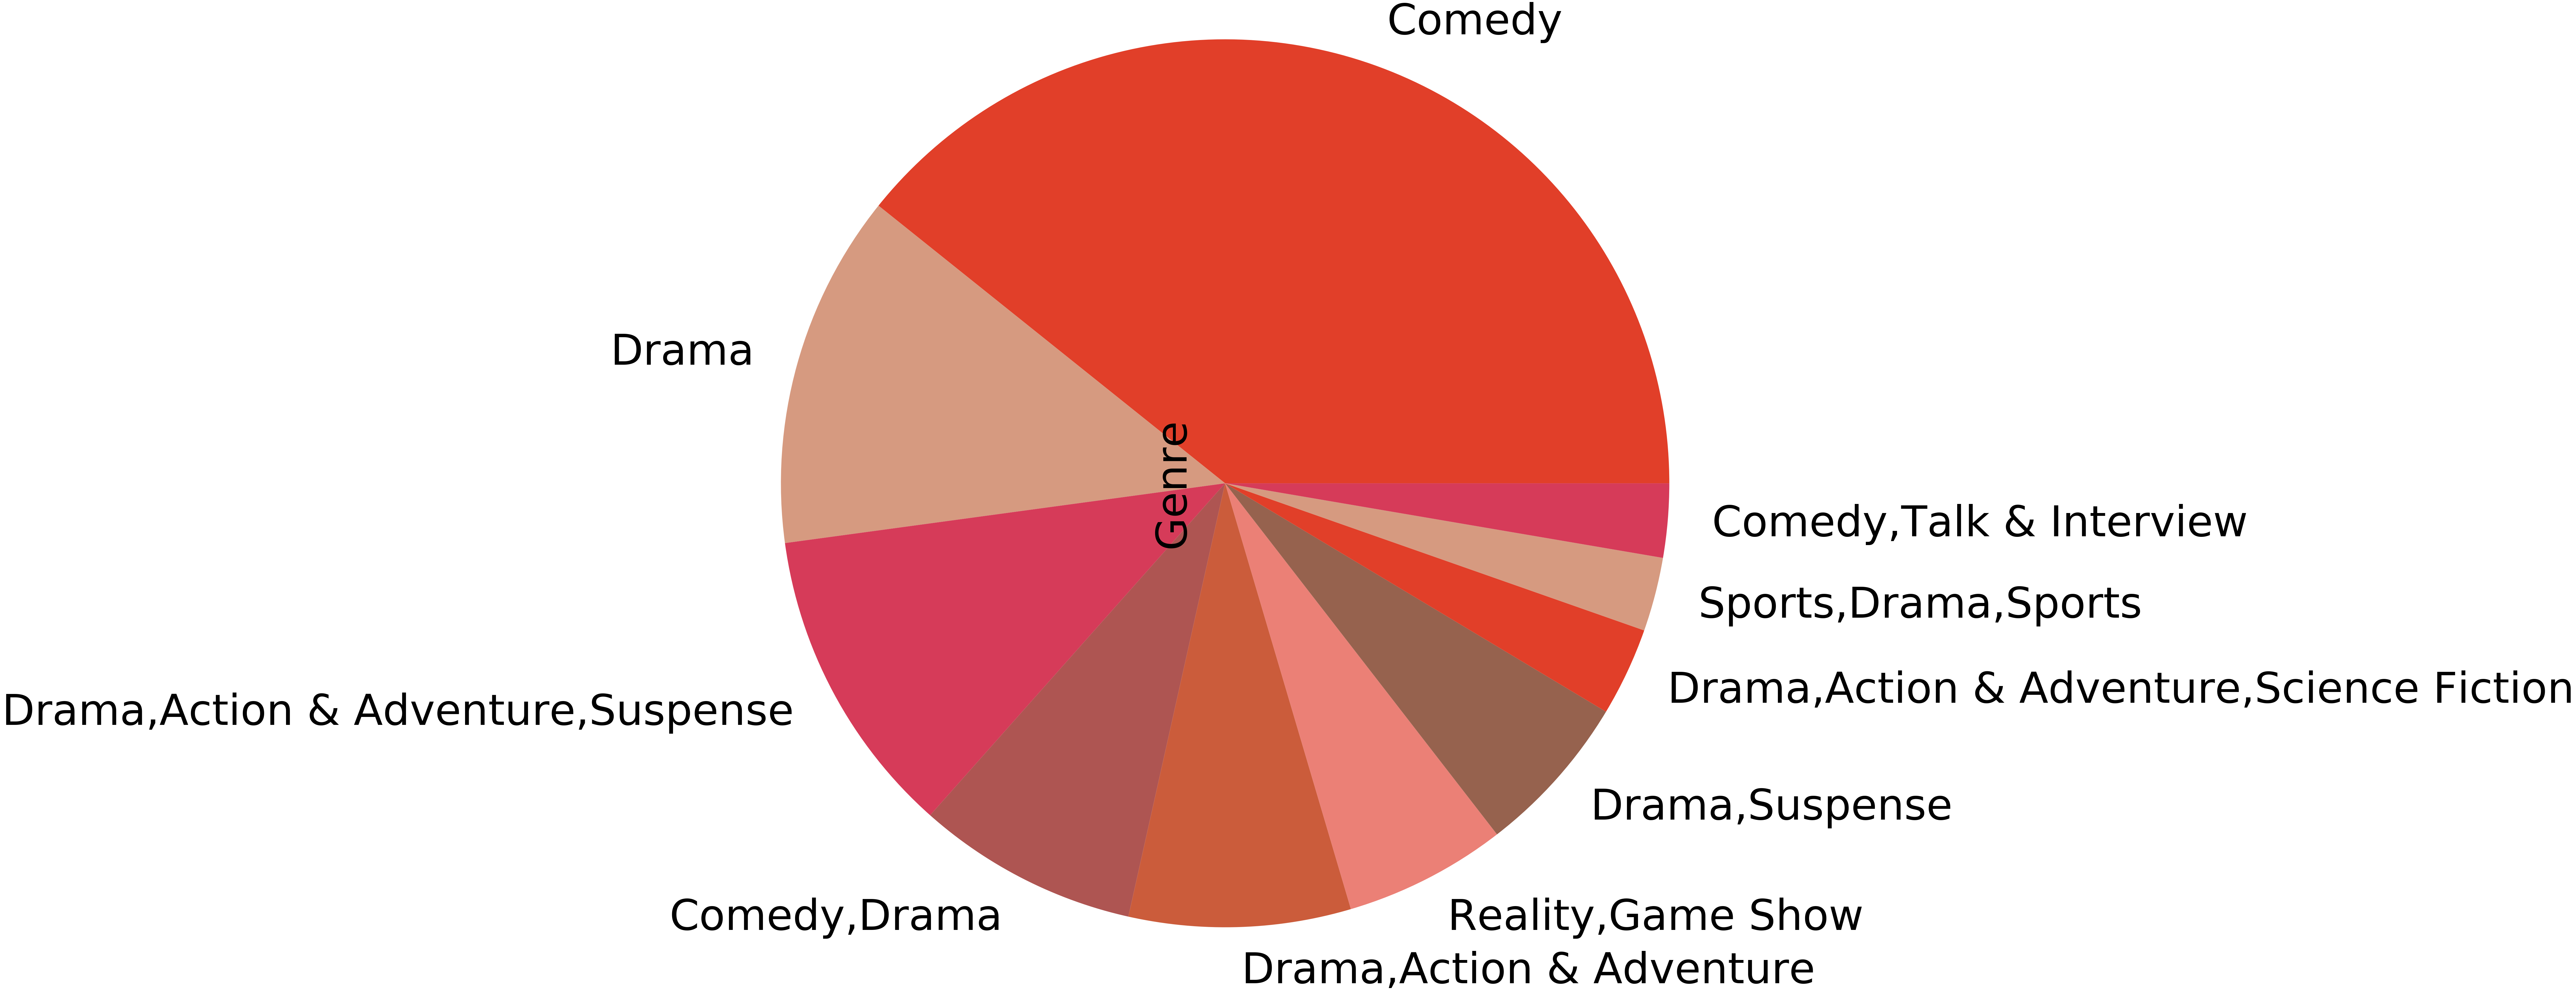

<Figure size 80x80 with 0 Axes>

In [59]:
colors =  ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]
nbc_genplot = nbc_genre[:10].plot.pie(y=nbc_genre[:10].index, shadow=False, colors=colors, radius=18)
plt.figure(figsize=(1, 1), dpi=80)
mpl.rcParams['font.size'] = 150.0

In [44]:
cw_genre = cw['Genre'].value_counts()
cw_genre

Drama                                               22
Comedy,Drama                                         8
Comedy                                               5
Drama,Science Fiction                                4
Drama,Action & Adventure,Fantasy                     4
Drama,Action & Adventure,Fantasy,Science Fiction     4
Drama,Suspense                                       3
Drama,Fantasy,Horror                                 3
Comedy,Drama,Music                                   2
Comedy,Fantasy                                       2
Drama,Action & Adventure,Science Fiction             2
Sports,Drama,Sports                                  2
Reality,Health & Lifestyle,Game Show                 2
Drama,Action & Adventure                             2
Drama,Fantasy                                        2
Drama,Suspense,Science Fiction                       1
Drama,Soap                                           1
Comedy,Reality,Game Show                             1
Reality,Do

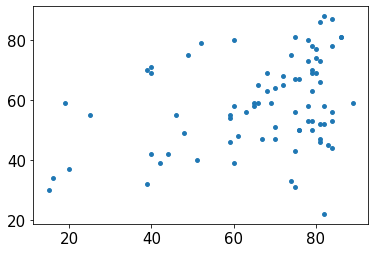

In [46]:
# plt.figure(figsize=(20,10))
plt.scatter(cw['User_Score']*10,cw['Critic_Score'], s=15)
mpl.rcParams['font.size'] =15.0

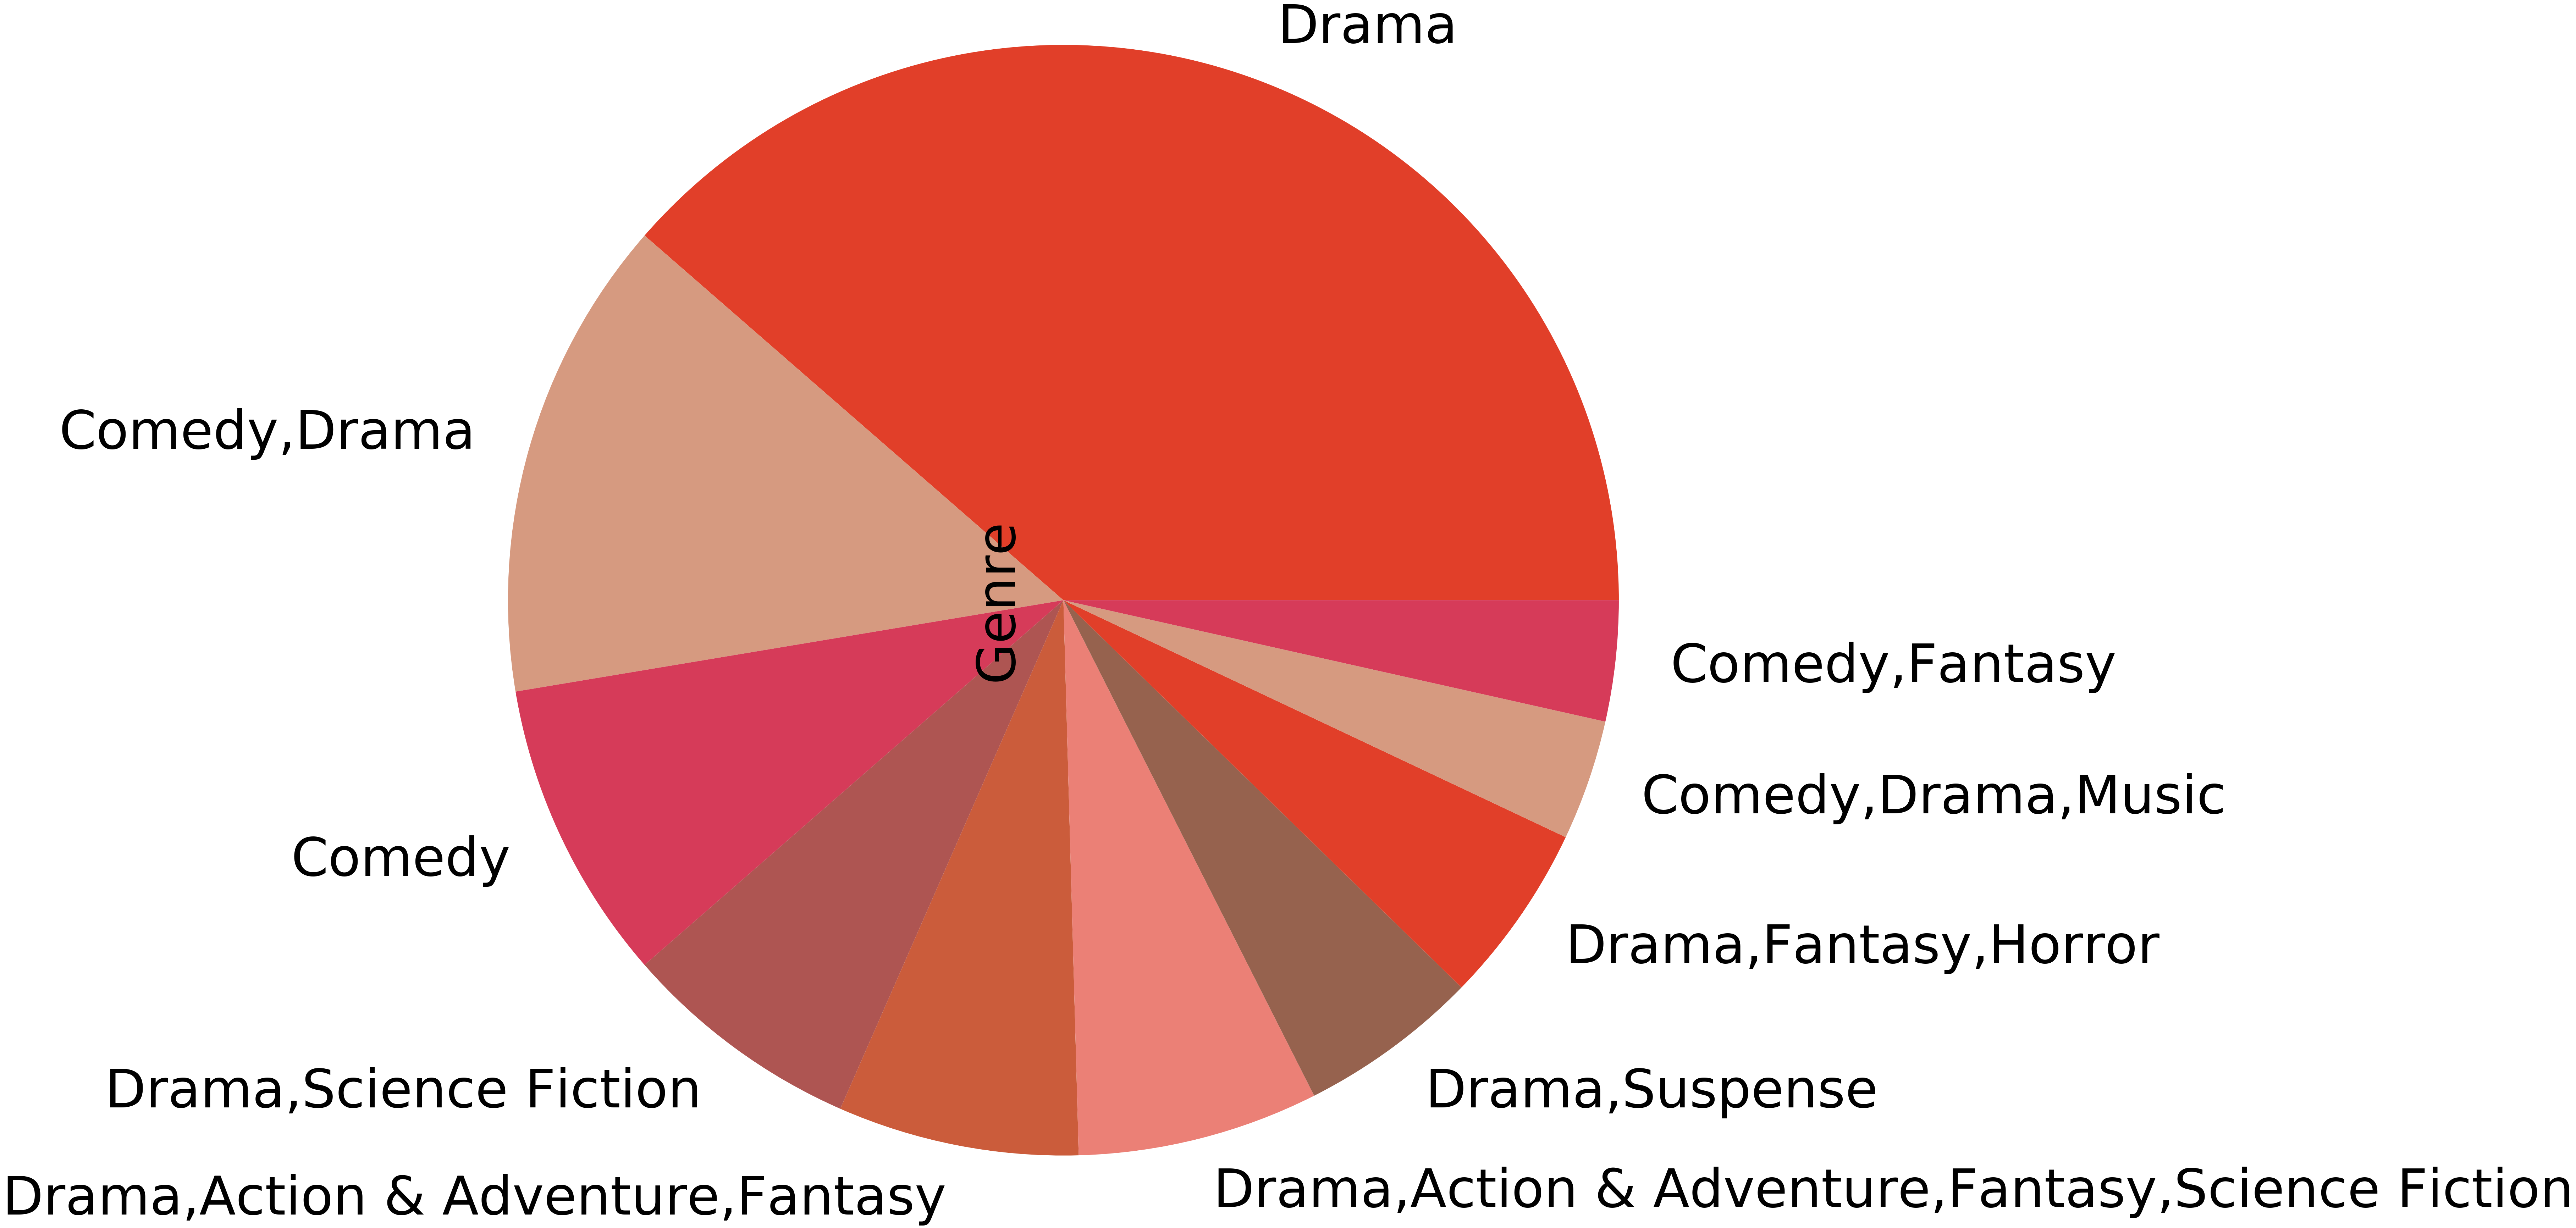

<Figure size 80x80 with 0 Axes>

In [60]:
colors =  ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]
cw_genplot = cw_genre[:10].plot.pie(y=cw_genre[:10].index, shadow=False, colors=colors, radius=18)
plt.figure(figsize=(1, 1), dpi=80)
mpl.rcParams['font.size'] = 150.0

## QUESTION: Does the season* play a part in the scores of the viewers?

**Winter Spring Summer Fall

#### Create two new columns. One for month of the season premiere and another for which season the month falls under

In [48]:
tv_date = pd.to_datetime(tv_2['Release_Date'])
tv_2['month'] = tv_date.dt.month

In [49]:
conditions = [
    (tv_2['month'] < 3) | (tv_2['month'] == 12),
    (tv_2['month'] >= 3) & (tv_2['month'] < 6),
    (tv_2['month'] >= 6) & (tv_2['month'] < 9),
    (tv_2['month'] >= 9) & (tv_2['month'] < 12)
]
choices = ['winter','spring','summer','fall']

tv_2['Seasons'] = np.select(conditions, choices, default='null')
tv_2

Critic_Score  Critics_votes  \
Title                                            
The Tudors                 64.0           27.0   
Sons Of Hollywood          21.0            8.0   
Chaos                      49.0           18.0   
The Killing                68.0           23.0   
Game of Thrones            90.0           26.0   
...                         ...            ...   
The Miniaturist            69.0            7.0   
YOU                        74.0           16.0   
REL                        46.0            6.0   
Kidding                    68.0           33.0   
Prodigal Son               59.0           12.0   

                                              Genre   Network Release_Date  \
Title                                                                        
The Tudors                           Drama,Suspense  SHOWTIME   2007-04-01   
Sons Of Hollywood            Reality,Game Show,Arts       A&E   2007-04-01   
Chaos               Comedy,Drama,Action & Adventure       CBS   2011-04-01   
The Killing                          Drama,Suspense       AMC   2012-04-01   
Game of Thrones    Drama,Action & Adventure,Fantasy       HBO   2012-04-01   
...                                             ...       ...          ...   
The Miniaturist                      Drama,Suspense       PBS   2018-09-09   
YOU                    Drama,Suspense,Tech & Gaming  LIFETIME   2018-09-09   
REL                                          Comedy       FOX   2018-09-09   
Kidding                                Comedy,Drama  SHOWTIME   2018-09-09   
Prodigal Son                                  Drama       FOX   2019-09-23   

                   Season  User_Score  Users_votes  month Seasons  
Title                                                              
The Tudors              1         6.9        130.0    4.0  spring  
Sons Of Hollywood       1         3.9         38.0    4.0  spring  
Chaos                   1         7.3         18.0    4.0  spring  
The Killing             2         8.2        138.0    4.0  spring  
Game of Thrones         2         9.1       2303.0    4.0  spring  
...                   ...         ...          ...    ...     ...  
The Miniaturist         1         5.5          6.0    9.0    fall  
YOU                     1         7.1         75.0    9.0    fall  
REL                     1         2.6          9.0    9.0    fall  
Kidding                 1         7.4         99.0    9.0    fall  
Prodigal Son            1         7.2         25.0    9.0    fall  

[3475 rows x 10 columns]

In [50]:
winter = tv_2.loc[tv_2.Seasons=="winter",:].dropna()
spring = tv_2.loc[tv_2.Seasons=="spring",:].dropna()
summer = tv_2.loc[tv_2.Seasons=="summer",:].dropna()
fall = tv_2.loc[tv_2.Seasons=="fall",:].dropna()

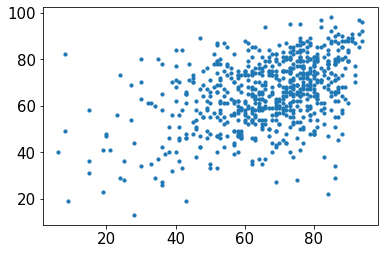

In [54]:
plt.scatter(winter['User_Score']*10,winter['Critic_Score'], s=10)
mpl.rcParams['font.size'] =15.0

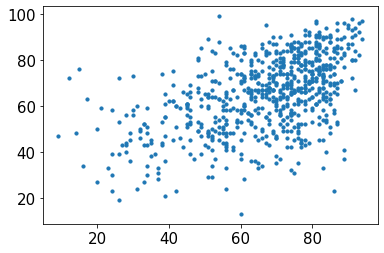

In [55]:
plt.scatter(spring['User_Score']*10,spring['Critic_Score'], s=10)
mpl.rcParams['font.size'] =15.0

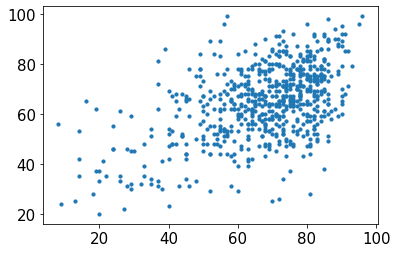

In [56]:
plt.scatter(summer['User_Score']*10,summer['Critic_Score'], s=10)
mpl.rcParams['font.size'] =15.0

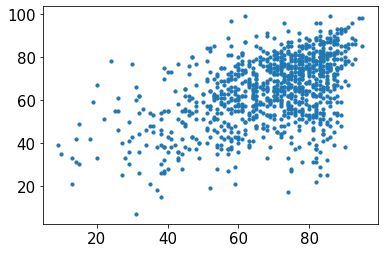

In [57]:
plt.scatter(fall['User_Score']*10,fall['Critic_Score'], s=10)
mpl.rcParams['font.size'] =15.0

### Null hypothesis: There is no significant difference between the user scores in the different seasons

In [95]:
stats.ttest_ind(winter['User_Score'], spring['User_Score'])

Ttest_indResult(statistic=-0.38211666398133365, pvalue=0.7024323744773191)

In [96]:
stats.ttest_ind(fall['User_Score'], summer['User_Score'])

Ttest_indResult(statistic=2.2734783308676016, pvalue=0.023124308245225947)

In [97]:
stats.ttest_ind(spring['User_Score'], summer['User_Score'])

Ttest_indResult(statistic=-0.3648993683670401, pvalue=0.7152421556379092)

In [98]:
stats.ttest_ind(fall['User_Score'], spring['User_Score'])

Ttest_indResult(statistic=2.7082386331236483, pvalue=0.006831118385152163)

In [99]:
stats.ttest_ind(winter['User_Score'], summer['User_Score'])

Ttest_indResult(statistic=-0.7436835482105628, pvalue=0.457196971267245)

In [100]:
stats.ttest_ind(fall['User_Score'], winter['User_Score'])

Ttest_indResult(statistic=3.1139622903842072, pvalue=0.0018769388160786958)